<a href="https://colab.research.google.com/github/xie186/Algorithms_for_DNA-Sequencing/blob/main/Algorithms_for_DNA_Sequencing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Week1 

## Welcome to Algorithms for DNA Sequencing

Welcome to Algorithms for DNA Sequencing!

This module we begin our exploration of algorithms for analyzing DNA sequencing data. We'll discuss DNA sequencing technology, its past and present, and how it works. We'll learn more about DNA and genomes and we'll make the connection that a DNA molecule can be represented as a string of characters. This observation is the key that unlocks the entire rest of the course! It allows us to take methods from computer science that were invented to work with generic strings (web pages, books, files on your hard drive) and apply them to DNA.

We will also define the two computational problems that motivate our technical discussions for the rest of the course. The read alignment problem and theassembly problem. The rest of the course is divided into halves where we will discuss foundational algorithms and data structures for those two crucial problems.

In the practical sessions and homeworks, you will be working with real genomes and real sequencing data, including some human data. And you will start to write software to analyze them. You will learn how to work with important file formats like FASTA and FASTQ, and you will look for some basic patterns in that sequencing data. Finally, we will discuss the naive exact matching algorithm a simple, flexible, but not very fast algorithm for finding patterns in text. Next module we'll discuss algorithms that are a bit more clever, and see some new data structures as well.

Your first two assignments, Programming Homework 1 and the Module 1 Quiz are due this week. Please also be sure to read the syllabus for all of the details about course logistics.

Ben & Jacob

Course Content
Module 1: DNA sequencing, strings and matching: Why study this? DNA sequencers and how they work. How DNA can be represented as a string. Using Python to parse and manipulate real genome sequences and real DNA sequencing data.  Naive exact matching.

Module 2: Preprocessing, indexing and approximate matching: Improving on naive exact matching with Boyer-Moore.  Preprocessing and indexing.  Indexing: grouping and ordering.  k-mers and k-mer indexes.  Approximate matching and the pigeonhole principle.

Module 3: Edit distance, assembly, overlaps: Hamming and edit distance. Algorithms for computing edit distance. Dynamic programming. Global and local alignment. De novo assembly. Overlaps and overlap graphs.

Module 4: Algorithms for assembly: Shortest common superstring and the greedy version. How repetitive DNA makes assembly difficult. De Bruijn graphs and Eulerian walks. How real assemblers work. The future of assembly. Wrap up.

Using data files with Python programs

In practical sessions and programming assignments, you will sometimes work with data files we provide.  These might be reference genomes in FASTA format (e.g. lambda_virus.fa), sequencing reads in FASTQ format (e.g. SRR835775_1.first1000.fastq), or Python modules (e.g. kmer_index.py).  To use a file with your Python code, you have to (a) download the file to the same computer as your Python program; use a web browser or a command-line tool like wget or curl to download it, then (b) put the file in the same directory with your Python program.  Then you can open it from your Python program using the Python open function.

If you use Jupyter, another way to do this (which we use in the practical sessions) is with a command that starts with !wget.  This is a shell command.  But if you are using try.jupyter.org note that the !wget command will not work ("unable to resolve host address").  In this case, we recommend you either (a) use www.wakari.io instead, or (b) use the "upload" button in the try.jupyter.org interface to upload the file to the server, then skip the command that begins with !wget.

Best,


## An implementation of the naive exact matching algorithm:

In [ ]:
# naive exact matching algorithm
# Returns a list of occurrences (offset)
def naive(p, t):
    occurrences = []
    for i in range(len(t) - len(p) + 1):  # loop over alignments
        match = True
        for j in range(len(p)):  # loop over characters
            if t[i+j] != p[j]:  # compare characters
                match = False
                break
        if match:
            occurrences.append(i)  # all chars matched; record
    return occurrences

In [ ]:
p = "ACGT"
ref = "ACGTTCAGACGT"
naive(p, ref)

[0, 8]

## Takes a DNA string and returns its reverse complement:


In [ ]:
def reverseComplement(s):
    complement = {'A': 'T', 'C': 'G', 'G': 'C', 'T': 'A', 'N': 'N'}
    t = ''
    for base in s:
        t = complement[base] + t
    return t


In [ ]:
p = "ACGT"
reverseComplement(p)

'ACGT'

In [ ]:
def readGenome(filename):
    genome = ''
    with open(filename, 'r') as f:
        for line in f:
            # ignore header line with genome information
            if not line[0] == '>':
                genome += line.rstrip()
    return genome

## Programming homework 1

In [ ]:
# Phi-X genome
!wget --no-check https://d28rh4a8wq0iu5.cloudfront.net/ads1/data/lambda_virus.fa


--2020-11-26 22:01:49--  https://d28rh4a8wq0iu5.cloudfront.net/ads1/data/lambda_virus.fa
Resolving d28rh4a8wq0iu5.cloudfront.net (d28rh4a8wq0iu5.cloudfront.net)... 54.192.19.127, 54.192.19.137, 54.192.19.199, ...
Connecting to d28rh4a8wq0iu5.cloudfront.net (d28rh4a8wq0iu5.cloudfront.net)|54.192.19.127|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 49270 (48K) [application/octet-stream]
Saving to: ‘lambda_virus.fa’

lambda_virus.fa     100%[===================>]  48.12K   205KB/s    in 0.2s    

2020-11-26 22:01:51 (205 KB/s) - ‘lambda_virus.fa’ saved [49270/49270]



In [ ]:
phix_genome = readGenome('lambda_virus.fa')

In [ ]:
# naive exact matching algorithm that is strand-aware
# Instead of looking only for occurrences of P in T, additionally look for occurrences of the reverse complement of P in T. 
def naive_with_rc(p, t):
	r = reverseComplement(p)
	if r == p:
		return naive(p,t)
	else:
		return naive(p,t) + naive(r,t)

### Question 1:

How many times does \verb|AGGT|AGGT or its reverse complement (\verb|ACCT|ACCT) occur in the lambda virus genome? E.g. if \verb|AGGT|AGGT occurs 10 times and \verb|ACCT|ACCT occurs 12 times, you should report 22.

In [ ]:
len(phix_genome)

48502

In [ ]:
len(naive_with_rc("AGGT", phix_genome))

306

### Question 2

How many times does \verb|TTAA|TTAA or its reverse complement occur in the lambda virus genome?

Hint: \verb|TTAA|TTAA and its reverse complement are equal, so remember not to double count.

In [ ]:

len(naive_with_rc("TTAA", phix_genome))

195

### Question 3
 
 What is the offset of the leftmost occurrence of \verb|ACTAAGT|ACTAAGT or its reverse complement in the Lambda virus genome? E.g. if the leftmost occurrence of \verb|ACTAAGT|ACTAAGT is at offset 40 (0-based) and the leftmost occurrence of its reverse complement \verb|ACTTAGT|ACTTAGT is at offset 29, then report 29.


In [ ]:
naive_with_rc("ACTAAGT", phix_genome)

[27733, 45382, 26028]

### Question 4 
What is the offset of the leftmost occurrence of \verb|AGTCGA|AGTCGA or its reverse complement in the Lambda virus genome?


In [ ]:
naive_with_rc("AGTCGA", phix_genome)

[18005, 23320, 33657, 44806, 450, 1908, 2472, 41927, 45369]

In [ ]:
min(naive_with_rc("AGTCGA", phix_genome))

450

In [ ]:
### Question 5 
As we will discuss, sometimes we would like to find approximate matches for P in T. That is, we want to find occurrences with one or more differences.

For Questions 5 and 6, make a new version of the \verb|naive|naive function called \verb|naive_2mm|naive_2mm that allows up to 2 mismatches per occurrence. Unlike for the previous questions, do not consider the reverse complement here. We're looking for approximate matches for P itself, not its reverse complement.

￼

For example, \verb|ACTTTA|ACTTTA occurs twice in \verb|ACTTACTTGATAAAGT|ACTTACTTGATAAAGT, once at offset 0 with 2 mismatches, and once at offset 4 with 1 mismatch. So \verb|naive_2mm('ACTTTA', 'ACTTACTTGATAAAGT')|naive_2mm(’ACTTTA’, ’ACTTACTTGATAAAGT’) should return the list \verb|[0, 4]|[0, 4].

In [ ]:

def naive_2mm(p, t):
    """
    Naive exact matching algorithm
    Neturns a list of occurrences (offset)
    """
    occurrences = []
    for i in range(len(t) - len(p) + 1):  # loop over alignments
        match = True
        mismatch_count = 0
        for j in range(len(p)):  # loop over characters
            if t[i+j] != p[j]:  # compare characters
                mismatch_count+=1

                if mismatch_count > 2:
                	match = False
                	break
        if match:
            occurrences.append(i)  # all chars matched; record
    return occurrences

In [ ]:
len(naive_2mm("TTCAAGCC", phix_genome))

191

### Question 6

What is the offset of the leftmost occurrence of \verb|AGGAGGTT|AGGAGGTT in the Lambda virus genome when allowing up to 2 mismatches?

In [ ]:

naive_2mm("AGGAGGTT", phix_genome)

49

### Question 7

Finally, download and parse the provided FASTQ file containing real DNA sequencing reads derived from a human:

https://d28rh4a8wq0iu5.cloudfront.net/ads1/data/ERR037900_1.first1000.fastq

Note that the file has many reads in it and you should examine all of them together when answering this question. The reads are taken from this study:

Ajay, S. S., Parker, S. C., Abaan, H. O., Fajardo, K. V. F., & Margulies, E. H. (2011). Accurate

and comprehensive sequencing of personal genomes. Genome research, 21(9), 1498-1505.

This dataset has something wrong with it; one of the sequencing cycles is poor quality.

Report which sequencing cycle has the problem. Remember that a sequencing cycle corresponds to a particular offset in all the reads. For example, if the leftmost read position seems to have a problem consistently across reads, report 0. If the fourth position from the left has the problem, report 3. Do whatever analysis you think is needed to identify the bad cycle. It might help to review the "Analyzing reads by position" video.

1 point


In [ ]:
!wget https://d28rh4a8wq0iu5.cloudfront.net/ads1/data/ERR037900_1.first1000.fastq

--2020-11-26 20:49:18--  https://d28rh4a8wq0iu5.cloudfront.net/ads1/data/ERR037900_1.first1000.fastq
Resolving d28rh4a8wq0iu5.cloudfront.net (d28rh4a8wq0iu5.cloudfront.net)... 54.192.19.127, 54.192.19.199, 54.192.19.103, ...
Connecting to d28rh4a8wq0iu5.cloudfront.net (d28rh4a8wq0iu5.cloudfront.net)|54.192.19.127|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 241626 (236K) [application/octet-stream]
Saving to: ‘ERR037900_1.first1000.fastq’

ERR037900_1.first10 100%[===================>] 235.96K   395KB/s    in 0.6s    

2020-11-26 20:49:20 (395 KB/s) - ‘ERR037900_1.first1000.fastq’ saved [241626/241626]



In [ ]:

def readFastq(filename):
    """
    Read fastq files
    """
    seqs = []
    quals = []
    with open(filename) as fh:
        while True:
            fh.readline()  # skip name line
            seq = fh.readline().rstrip()  # read base sequence
            fh.readline()  # skip placeholder line
            qual = fh.readline().rstrip() # base quality line
            if len(seq) == 0:
                break
            seqs.append(seq)
            quals.append(qual)
    return seqs, quals

In [ ]:
sequences, base_quals = readFastq('ERR037900_1.first1000.fastq')


In [ ]:
len(sequences[1])

100

In [ ]:
base_quals[0:2]



['HHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHGFHHHFHFFHHHHHGHHFHEH@4#55554455HGFBF<@C>7EEF@FBEDDD<=C<E',
 'HHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHCHHHHEHHBA#C>@54455C/7=CGHEGEB;C############']

0
1
2
3
4
5
6
7
8


In [ ]:
def averageQuals(quals):
    counter = {}
    qual_sum = {}
    average_qual = {}
    for qual in quals:
        for i in range(len(qual)):
            base_qual = qual[i]
            phred_score = ord(base_qual) - 33
            #print(phred_score)
            if i not in qual_sum:
                qual_sum[i] = phred_score
            else:
                qual_sum[i] += phred_score
            if i not in counter:
                counter[i] = 1
            else:
                counter[i] += 1
    for ele in qual_sum:
        #print("%d %d  %d" % (ele, qual_sum[ele], counter[ele]))
        average_qual[ele] = qual_sum[ele]/counter[ele]
    return average_qual
             



In [ ]:
average_qual = averageQuals(base_quals)


In [ ]:
import matplotlib.pyplot as plt


In [ ]:

average_qual.values()

dict_values([38.435, 38.46, 38.4, 38.428, 38.417, 38.382, 38.362, 38.364, 38.325, 38.343, 38.194, 38.154, 38.089, 38.152, 38.153, 38.099, 38.055, 38.041, 38.067, 38.15, 38.087, 37.989, 38.009, 37.909, 38.028, 37.576, 37.514, 37.503, 37.578, 37.552, 37.629, 37.555, 37.548, 37.433, 37.402, 37.343, 37.198, 37.126, 37.158, 36.904, 36.742, 36.677, 36.645, 36.493, 36.509, 36.375, 36.205, 35.974, 35.847, 35.673, 34.832, 34.739, 34.399, 34.402, 34.025, 33.025, 32.882, 32.741, 32.573, 32.224, 30.805, 30.666, 30.343, 30.131, 29.463, 17.891, 4.526, 17.881, 17.865, 17.852, 17.466, 17.131, 17.134, 17.098, 16.852, 23.745, 23.958, 23.221, 22.902, 22.366, 20.904, 20.584, 20.383, 19.767, 19.095, 18.061, 17.757, 17.152, 16.972, 16.286, 14.811, 14.679, 14.31, 14.152, 13.734, 12.538, 12.278, 12.179, 11.676, 11.561])

In [ ]:

average_qual.keys()

dict_keys([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99])

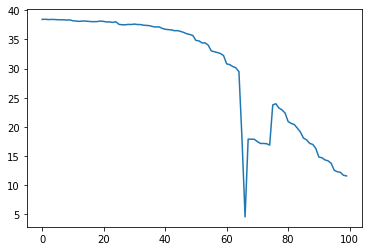

In [ ]:
plt.plot(list(average_qual.keys()),  list(average_qual.values()))


In [ ]:
average_qual[66]

4.526

# Week3 

## Hamming Distance and edit distance

editDistance()


## Read alignment in the field

Index acts as a filtering. 


Small set of needdles.

Index and dynamic programming cover each other's flaw.

Index doesn't deal with mismatches

Dynaminal program cann't handle big matrix.


##  Assembly: working from scratch



### Denovo assembly

![image](https://user-images.githubusercontent.com/20909751/100520200-928de800-316a-11eb-9916-fe6966b7e7c6.png)



Coverage

![image](https://user-images.githubusercontent.com/20909751/100520265-ec8ead80-316a-11eb-9b13-db76e4b0ce0e.png)


Average coverage


* First law of assembly

If a suffix of read A is smilar to prefix of read B, then A and B might overlap in the genome

* Second law of assembly

More coverage leads to more and long overlaps


### Practical: Overlaps between pairs of reads


In [1]:
def overlap(a, b, min_length=3):
    """

    """
    start = 0
    while True:
        start = a.find(b[:min_length], start)
        if start == -1:
            return 0
        if b.startswith(a[start:]):
            return len(a) - start
        start += 1



In [2]:
## Overlap with 3 letters
overlap("TTACGT", "CGTACCGT")

3

In [3]:
## Overlap with two letters

overlap("TTACGT", "GTACCGT")

0

### Practical: Finding and representing all overlaps



In [4]:
from itertools import permutations
list(permutations([1,2,3], 3))

[(1, 2, 3), (1, 3, 2), (2, 1, 3), (2, 3, 1), (3, 1, 2), (3, 2, 1)]

In [7]:
def naive_overlap_map(reads, k):
    olaps = {}
    for a, b in permutations(reads, 2):
      olen = overlap(a, b, min_length=k)
      if olen > 0:
          olaps[(a, b)] = olen
    return olaps


In [8]:
reads = ['ACGGACGATC', "GATCAAGT", "TTCACGGA"]
print(naive_overlap_map(reads, 3))

{('ACGGACGATC', 'GATCAAGT'): 4, ('TTCACGGA', 'ACGGACGATC'): 5}


# Week 4


## The shortest common superstring problem

Given as a set of strings __*S*__, find SCS (S): shortest string contaming the strings in __*S*__ 

Idea: pick order for strings in __*S*__ and construct superstring.

Try all posible orderings and pcik shorted superstring

If $S$ contains $n$ strings, $n!$ (n factoirial) orderings possible. 

So n factorial is a quantity that grows very quickly as $n$ grows. As the number of input strings grows, the amount of work that we have to do, the amount of permutations we have to try grows very, very rapidly. That's why we call this problem an intractable problem. 

In [9]:

import itertools

def scs(ss):
    """
    brute force method????
    Returns shortest common superstring of given strings,
    assuming no string is a strict substring of another 
    """
    shortest_sup = None
    ## return every possible orders
    for ssperm in itertools.permutations(ss):
        sup = ssperm[0]
        for i in range(len(ss)-1):
            olen = overlap(ssperm[i], ssperm[i+1], min_length=1)
            sup += ssperm[i+1][olen:]
        if shortest_sup is None or len(sup) < len(shortest_sup):
            shortest_sup = sup
    return shortest_sup

In [11]:
scs(['ACGGATGAGC', 'GAGCGGA', 'GAGCGAG'])

'ACGGATGAGCGAGCGGA'

###  Greedy shortest common superstring

Picking the longest overlap seems to make sense because the longer the overlaps between the strings, the shorter the final string will be. So that's what we mean by greedy algorithm in this case. 

The greedy alogrith doesn't always give the correct results. 


In [20]:
import itertools
def pick_maximal_overlap(reads, k):
    reada, readb = None, None
    best_olen = 0
    for a, b in itertools.permutations(reads, 2):
        olen = overlap(a, b, min_length=k)
        # There might be multiple pairs that are tied for the maximal overlap length
        if olen > best_olen:
            reada, readb = a, b
            best_olen = olen
    return reada, readb, best_olen

def greedy_scs(reads, k):
    readA, readB, olen = pick_maximal_overlap(reads, k)
    while olen > 0:
        reads.remove(readA)
        reads.remove(readB)
        reads.append(readA+readB[olen:])
        readA, readB, olen = pick_maximal_overlap(reads, k)
    # we merge and merge and merge we might get to the point where there are no
    # more edges, no more overlaps left in the overlap graph, but there are still 
    #multiple nodes left, in which case we can just concatenate the node labels 
    # together to get our super string. 
    return ''.join(reads)

In [21]:
greedy_scs(['ABC', "BCA", "CAB"], 2)

'CABCA'

In [22]:
greedy_scs(['ABCD', "CDBC", "BCDA"], 1)

'CDBCABCDA'

In [25]:
# Let's run it with the brute force method and see what the best one for that is. 
# So you can see on this that the shortest common superstring is actually shorter 
# than the Greedy superstring, and the reason for this is to get the shortest common
# superstring, you can just combine these reads in order, and each one overlaps by 
# two with the one after it. 
# But the first string and the third string actually overlap by three. So the Greedy 
# algorithm will initially merge those two together into a larger string, and 
# then it has no option but to just append the middle string to the end since it doesn't 
# have any overlap. 
# So it actually does a bit worse by doing the Greedy method here. #
# But that trade-off in terms of accuracy, in most cases, will be worth the time 
# you save by doing the Greedy method right? 

scs(['ABCD', "CDBC", "BCDA"])

'ABCDBCDA'

### Third law of assembly: repeats are bad

Repetitive sequences can make it difficult or even impossible to correctly assemble the original genome. Repetitive sequences cause ambiguity, and just like if you're trying to put together a puzzle and the puzzle is like half featureless sky pieces, just like in that case, it's not always going to be easy or possible to resolve the ambiguity. So the third law of assembly states, repeats make assembly difficult. 

called the de Bruijn graph and the Eulerian walk method.
Play video starting at :5:31 and follow transcript5:31
That's an alternative that actually avoids the over collapsing problem. So it avoids this particular problem. But it still can't avoid the overall problem that repeats make assembly difficult. And in another later lecture, we'll see how real assembly software deals with this issue. And then in another lecture, we'll look a bit closer at whether new sequencing technologies might be able to help us sidestep this problem.




### Building a De Bruijn graph


In [54]:
def de_bruijn_ize(st, k):
    edges = []
    nodes = set()
    for i in range(len(st) - k +1 ):
      edges.append((st[i:i+k-1], st[i+1:i+k]))
      nodes.add(st[i:i+k-1])
      nodes.add(st[i+1:i+k])
    return nodes, edges  

In [55]:
nodes, edges = de_bruijn_ize("ACGCGTCG", 3)
print(nodes)
print(edges)

{'GT', 'CG', 'AC', 'TC', 'GC'}
[('AC', 'CG'), ('CG', 'GC'), ('GC', 'CG'), ('CG', 'GT'), ('GT', 'TC'), ('TC', 'CG')]


In [56]:
def visualize_de_bruijn(st, k):
    """ Visualize a directed multigraph using graphviz """
    nodes, edges = de_bruijn_ize(st, k)
    dot_str = 'digraph "DeBruijn graph" {\n'
    for node in nodes:
        dot_str += '  %s [label="%s"] ;\n' % (node, node)
    for src, dst in edges:
        dot_str += '  %s -> %s ;\n' % (src, dst)
    return dot_str + '}\n'

In [37]:
!pip install gvmagic

  Created wheel for gvmagic: filename=gvmagic-0.5-cp36-none-any.whl size=10376 sha256=7fb1c81be490dd75f352c746c2262a40f7dfaa2e900fb6404279d41044c1d391
  Stored in directory: /root/.cache/pip/wheels/f6/67/1f/64d62350d4cffe0a94e39af37828a6a5bfba1b9b9d6d95dbf8
Successfully built gvmagic


In [ ]:
%load_ext gvmagic

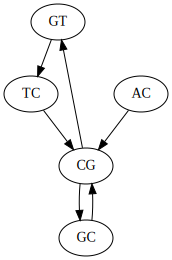

In [57]:
%dotstr visualize_de_bruijn("ACGCGTCG", 3)


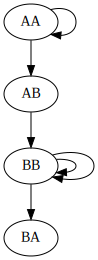

In [58]:
%dotstr visualize_de_bruijn("AAABBBBA", 3)


# Reference


https://github.com/sidsriv/Algorithms-for-DNA-sequencing

https://github.com/pejvan/Algorithms-for-DNA-Sequencing

https://github.com/claytonjwong/Algorithms-DNA-Sequencing

https://github.com/kritikadusad/AlgorithmsForDNASequencing

https://www.sciencedirect.com/science/article/abs/pii/S0377221716304830

Dimitri J. 2020. Exact and approximation algorithms for DNA sequence reconstruction.

Najam M, Rasool RU, Ahmad HF, Ashraf U, Malik AW. 2019. Pattern Matching for DNA Sequencing Data Using Multiple Bloom Filters. Biomed Res Int 2019. 

https://github.com/mrhua2019/Pattern-Matching-for-DNA-Sequencing-Data-using-Multiple-Bloom-Filters#readme

Langmead B. 2557. ALGORITHMS AND HIGH PERFORMANCE COMPUTING APPROACHES FOR SEQUENCING-BASED COMPARATIVE GENOMICS. 7: 1–16. https://drum.lib.umd.edu/handle/1903/12569.
